In [1]:
# Initial imports
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
# modeling
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing
from sklearn.linear_model import LinearRegression

import wrangle
import explore

import sys
import os
from env import username, api_key, download_kaggle_file

home_directory_path = os.path.expanduser('~')
sys.path.append(home_directory_path +'/utils')

import wrangle_utils as w
import explore_utils as e
import model_utils as m
import env

import warnings
warnings.filterwarnings("ignore")

# 
# Wrangle

In [2]:
# Bring in the data
df = wrangle.wrangle_superstore()

In [3]:
# Perform a 70/15/15 split on the dataframe
train, validate, test = wrangle.split_superstore(df)

 Train shape: (6990, 10)
 Validate shape: (1504, 10)
 Test shape (1500, 10)


#
# Explore
- General exploration
- Time exploration

## General exploration:
- Finding relationships between features and sales

## Initial questions:
- What are the highest selling regions?
- What are the highest selling states?
- What are the highest selling segments?
- What are the highest selling categories?

## Question 1:
- What are the highest selling regions?

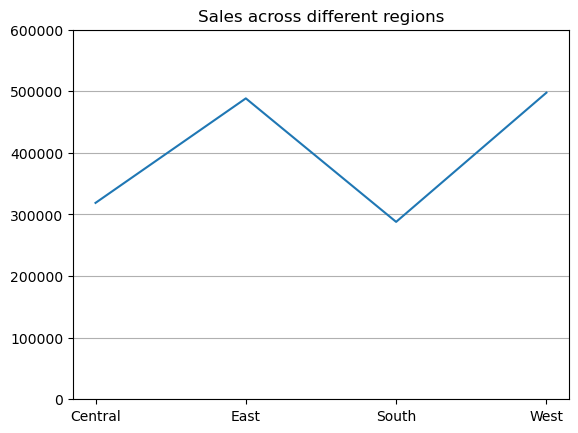

In [4]:
# Plot the sales across different regions
plt.plot(train.groupby('region').sales.agg('sum'))
plt.ylim(0, 600_000);
plt.grid(axis='y')
plt.title('Sales across different regions');

### Observations: 
- The south brings in about half as many sales as the west

## Question 2:
- What are the highest selling states?

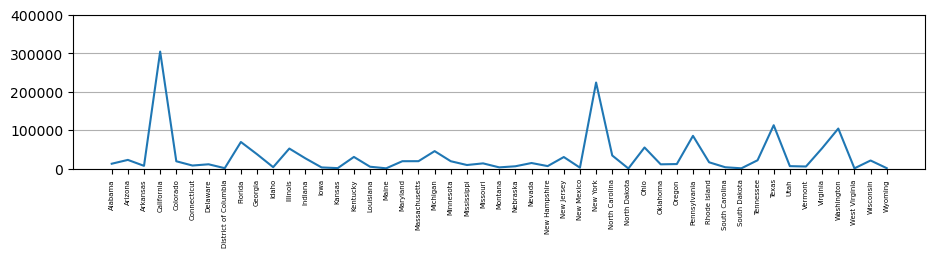

In [5]:
# Plot the sales across different states
plt.figure(figsize=(11,2))
plt.plot(train.groupby('state').sales.agg('sum'))
plt.ylim(0, 400_000)
plt.xticks(fontsize=5,rotation=90);
plt.grid(axis='y')

### Observations: 
- the highest selling states are California (330k), New York (200k), Texas (110k), and Washington (100k)

## Question 3:
- What are the highest selling segments?

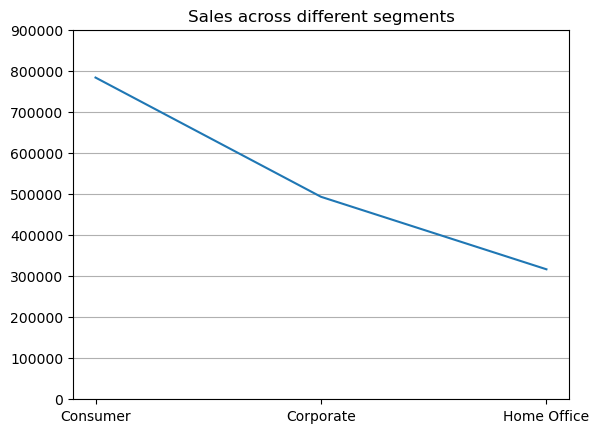

In [6]:
# Plot the sales across different segments
plt.plot(train.groupby('segment').sales.agg('sum'))
plt.ylim(0, 900_000);
plt.grid(axis='y')
plt.title('Sales across different segments');

### Observations: 
- the consumer category brings in much more (800,000) than corporate (500,000), which brings in more than home office (300,000)

## Question 4:
- What are the highest selling categories?

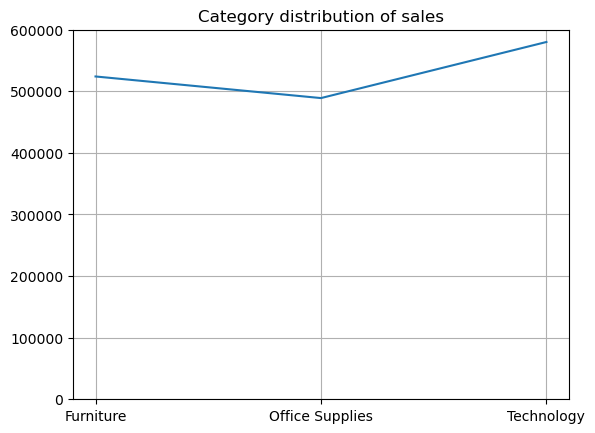

In [7]:
plt.plot(train[['category', 'sales']].groupby('category').sales.agg('sum'))
plt.grid('y')
plt.ylim(0, 600_000)
plt.title(f'Category distribution of sales');

### Observations:
- Each category produces a similar amount of sales

#
## Time exploration:
- Finding patterns in sales volume over time


train length: 1166
validate length: 145
test length: 147
    


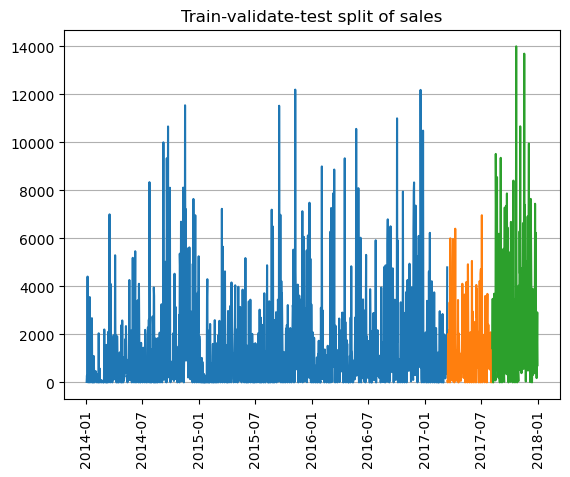

In [8]:
# Bring in the data, prepare, and split into train, validate, and test
train, validate, test = explore.time_wrangle_superstore(df, 'Train-validate-test split of sales')

# 
## Explore Summary: 
- The south region produces about half as many sales as the west region
- the highest selling states are California (330k), New York (200k), Texas (110k), and Washington (100k)
- the consumer category produces many more sales (800,000) than corporate (500,000), which produces more than home office (300,000)
- Each category produces a similar amount of sales

### Additional Notes:
- During feature engineering dummy columns of category, region, and segment were created and aggregated by mean over a weekly and monthly timescale then evaluated for correlation with sales. It was determined that none of these aggregations correlated with the sales volume

#
# Model